**Seeding for reproducibility**

In [26]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

**Importing the dependencies**

In [27]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

**Data Curation**

Upload the kaggle.json file

In [28]:
import os

# Set environment variables with your credentials
os.environ['KAGGLE_USERNAME'] = 'ramshakk'
os.environ['KAGGLE_KEY'] = '41db39eb89136440b3acdbc435bfeb21'

# Now use the API
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()
api.dataset_download_files('abdallahalidev/plantvillage-dataset', path='./', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset


In [29]:
!ls

'plantvillage dataset'


In [31]:
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['segmented', 'grayscale', 'color']
38
['Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Corn_(maize)___healthy', 'Grape___Esca_(Black_Measles)', 'Tomato___Tomato_mosaic_virus']
38
['Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Corn_(maize)___healthy', 'Grape___Esca_(Black_Measles)', 'Tomato___Tomato_mosaic_virus']
38
['Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Corn_(maize)___healthy', 'Grape___Esca_(Black_Measles)', 'Tomato___Tomato_mosaic_virus']


**Number of Classes = 38**

In [32]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['c431d237-0d9a-42ea-b51c-953341859808___Mt.N.V_HL 9109.JPG', '393e4626-fd31-45aa-a67d-bb71837332ee___Mt.N.V_HL 9130.JPG', '75ad9d58-7f7e-4a4c-8ced-fec8d23d9a7e___Mt.N.V_HL 6170.JPG', 'e1520328-8fdd-42a9-bd49-95721a89078c___Mt.N.V_HL 6125.JPG', '238c25f0-d106-48d9-adf1-f7e95e773a02___Mt.N.V_HL 8966.JPG']


**Data Preprocessing**

In [33]:
# Dataset Path
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


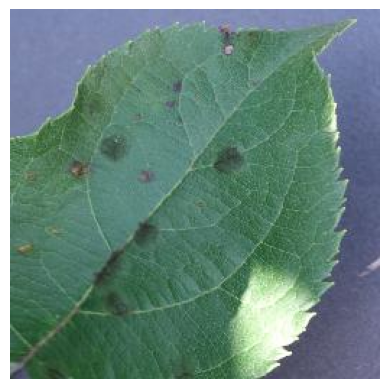

In [34]:
image_path = '/kaggle/working/plantvillage dataset/color/Apple___Apple_scab/01f3deaa-6143-4b6c-9c22-620a46d8be04___FREC_Scab 3112.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [35]:
image_path = '/kaggle/working/plantvillage dataset/color/Apple___Apple_scab/01f3deaa-6143-4b6c-9c22-620a46d8be04___FREC_Scab 3112.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[123 135 177]
  [124 136 178]
  [124 136 178]
  ...
  [124 137 181]
  [129 142 186]
  [132 145 189]]

 [[123 135 177]
  [123 135 177]
  [123 135 177]
  ...
  [124 137 181]
  [128 141 185]
  [131 144 188]]

 [[122 134 176]
  [122 134 176]
  [122 134 176]
  ...
  [124 137 181]
  [126 139 183]
  [128 141 185]]

 ...

 [[ 74  86  86]
  [ 64  75  77]
  [ 56  65  74]
  ...
  [104 103 135]
  [106 105 137]
  [111 110 142]]

 [[ 58  70  70]
  [ 57  68  70]
  [ 60  69  78]
  ...
  [108 107 139]
  [110 109 141]
  [116 115 147]]

 [[ 48  60  60]
  [ 54  65  67]
  [ 62  71  80]
  ...
  [112 111 143]
  [114 113 145]
  [120 119 151]]]


In [36]:
# Image Parameters
img_size = 224
batch_size = 32

**Train Test Split**

In [37]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [38]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [39]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


**Convolutional Neural Network**

In [40]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [41]:
# model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Model training**

In [43]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 78s 55ms/step - accuracy: 0.6034 - loss: 1.6236 - val_accuracy: 0.8736 - val_loss: 0.4034
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 75s 55ms/step - accuracy: 0.9226 - loss: 0.2492 - val_accuracy: 0.8841 - val_loss: 0.3777
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 77s 56ms/step - accuracy: 0.9677 - loss: 0.1024 - val_accuracy: 0.8710 - val_loss: 0.4635
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 74s 54ms/step - accuracy: 0.9787 - loss: 0.0662 - val_accuracy: 0.8569 - val_loss: 0.6030
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 75s 55ms/step - accuracy: 0.9794 - loss: 0.0645 - val_accuracy: 0.8607 - val_loss: 0.6485


**Model Evaluation**

In [44]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.8631 - loss: 0.6397
Validation Accuracy: 86.07%


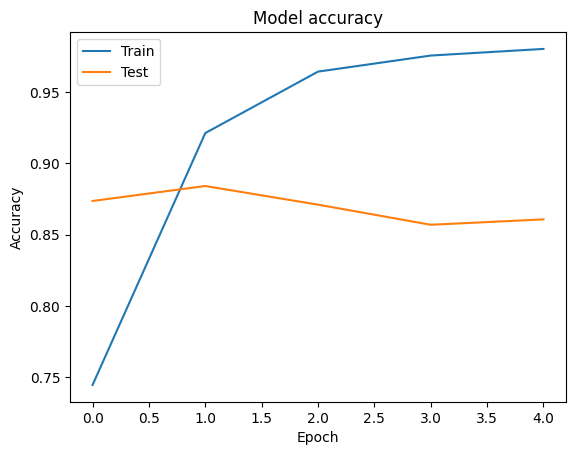

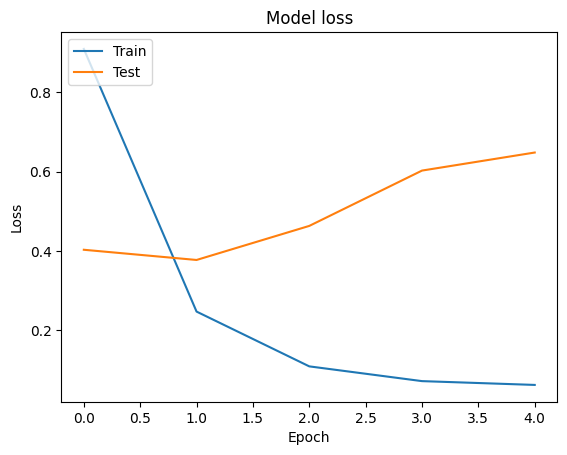

In [45]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Building a Predictive System**

In [51]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [61]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [53]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [49]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [59]:
# Example Usage
#image_path = '/kaggle/input/leaf-disease/leaf_apple_rot.jpg'
image_path = '/kaggle/input/leaf-disease/blueberry-leaves-5931369_healthy.webp'
#image_path = '/kaggle/input/leaf-disease/potato_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Class Name: Blueberry___healthy


**Save the model to Google drive or local**

In [60]:
model.save('plant_disease_prediction_model.h5')